# Using Metropolis algorithm

### Comparison between exct, analytic and numeric solution in the no interacting case


In [1]:
'''
|===========================================================================|
|Variational Monte Carlos                                                   |
|~ Considerations:                                                          |
|    1 Using Harmoninc oscilator as wave funtion                            |                                                                           
|    2 Brute force Metropolis(No importance sampling)                       |
|    3 No energy minimization(Varying alpha value)                          | 
|    4 No interacting case                                                  |        
|===========================================================================|  
'''
# packes
import numpy  as np

from VMCM.Algorithm.Algorithms import Algorithms


In [13]:
# Here starts the main program with variable declarations
Number_particles = 1
Dimension = 1
Number_MC_cycles = 10**3


# Type algorithm
algorithm = 'Metropolis'

# Type of calculation
Type_calculations_analytic = 'analytic'

# Instantce class algorithm
algorithm_analytic =  Algorithms() 

# Setting algorithm
metropolis_analytic = algorithm_analytic.set_algorithm(Number_particles, Dimension, algorithm, Type_calculations_analytic, Number_MC_cycles = Number_MC_cycles)

# Type of calculation
Type_calculations_numeric =  'numeric'

algorithm_numeric =  Algorithms() 
metropolis_numeric =  algorithm_numeric.set_algorithm(Number_particles, Dimension, algorithm, Type_calculations_numeric, Number_MC_cycles = Number_MC_cycles)

# To vary alpha
Variations_alfa = 20
Alpha_start = 0.1
StespAlpha = 0.05

# Save uotputs for each variation of alpha
Alpha_values = np.zeros(Variations_alfa)

# Analytic result
Energies_analytic = np.zeros(Variations_alfa)
Variances_anayltic_ = np.zeros(Variations_alfa)
errors_anayltic = np.zeros(Variations_alfa)
Time_consumings_anayltic_alpha = np.zeros(Variations_alfa)

# Numeric result
Energies_numeric = np.zeros(Variations_alfa)
Variances_numeric = np.zeros(Variations_alfa)
errors_numeric = np.zeros(Variations_alfa)
Time_consumings_numeric_alpha= np.zeros(Variations_alfa)

# Start variational parameter
alpha = Alpha_start
for ia in range(Variations_alfa):
    alpha += StespAlpha 
    Alpha_values[ia] = alpha
    Energies_analytic[ia],Variances_anayltic_[ia],errors_anayltic[ia],Time_consumings_anayltic_alpha[ia] = metropolis_analytic(alpha)
    Energies_numeric[ia],Variances_numeric[ia],errors_numeric[ia],Time_consumings_numeric_alpha[ia] = metropolis_numeric(alpha)   

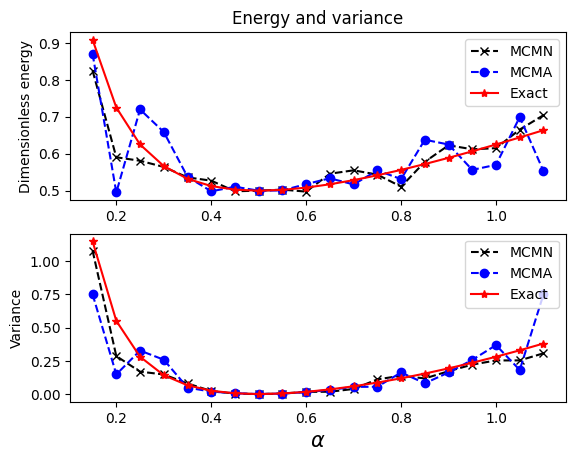

In [14]:
# packs
import matplotlib.pylab as plt

from VMCM.Hamiltonian.ExactSolution import ExactSolution
from VMCM.utils.PathSaveOutput import SaveOutput

# Instantiation exact solution
Ect = ExactSolution(Number_particles,Dimension)

# Instantiation SaveOutput 
save = SaveOutput('Result-part-b') 

# Exact energy
Exact_energies = Ect.exact_energy_ho_no_interact(Alpha_values) 
Exact_variance = Ect.exact_variance_ho_no_interact(Alpha_values) 

# Simple subplot exact, analytic and numeric solution vs alpha values
fig = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(Alpha_values, Energies_numeric, 'kx--', label='MCMN')
plt.plot(Alpha_values, Energies_analytic, 'bo--', label='MCMA')
plt.plot(Alpha_values, Exact_energies,'r*-',label='Exact')
plt.title('Energy and variance')
plt.ylabel('Dimensionless energy')
plt.xlabel(r'$\alpha$', fontsize=15)
plt.legend(loc='upper right')

plt.subplot(2, 1, 2)
plt.plot(Alpha_values, Variances_numeric, 'kx--',label='MCMN')
plt.plot(Alpha_values, Variances_anayltic_, 'bo--',label='MCMA')
plt.plot(Alpha_values, Exact_variance,'r*-',label='Exact')
plt.ylabel('Variance')
plt.xlabel(r'$\alpha$', fontsize=15)
plt.savefig(save.figure_path('Varying-alpha-exact-analy-'+ str(Number_particles)+'p-'+ str(Dimension)+'D') + ".png", format='png')
plt.legend(loc='upper right')
plt.show()

## Time consuming vs number of Monte Carlos cycles

##### Here it is used parallel processing in orden to optimized the time, but could be calculated the similiar way as the step before

In [6]:
# Packes
from VMCM.VaryingParameter import VaryingNumberMCCycles

# Here starts the main program with variable declarations
Number_particles = 10
Dimension = 1

# Alpha value
alpha = 0.500229 # Alpha was calculated using minimization with gradient descent method


# Number core
Number_core = 10

Variation_number_MC_cycles = 10
Step = 1000

# Type algorithm
algorithm = 'Metropolis'

# Type of calculation
Type_calculations_analytic = 'analytic'

Varying_number_MC_cycles_analytic = VaryingNumberMCCycles(Number_particles, Dimension, algorithm, Type_calculations_analytic, alpha = alpha)

Energies_analytic, Variances_analytic, errors_analytic, Time_consuming_analytic, All_number_MC_cycles = Varying_number_MC_cycles_analytic.varying_Number_MC_Cycles(Variation_number_MC_cycles, Step, Number_core)

# Type of calculation
Type_calculations_numeric =  'numeric'

Varying_number_MC_cycles_numeric = VaryingNumberMCCycles(Number_particles, Dimension, algorithm,Type_calculations_numeric, alpha = alpha)

Energies_numeric, Variances_numeric, errors_numeric, Time_consuming_numeric, All_number_MC_cycles = Varying_number_MC_cycles_numeric.varying_Number_MC_Cycles(Variation_number_MC_cycles, Step, Number_core)

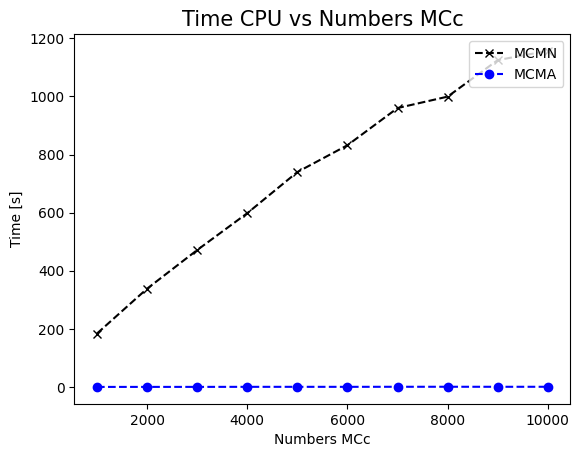

In [10]:
# Packes
import matplotlib.pylab as plt
from VMCM.utils.PathSaveOutput import SaveOutput

# Instantiation SaveOutput 
save = SaveOutput('Result-part-b') 

# Simple subplot time consuming vs number of monte carlos cycles for analytic and numeric solution
fig = plt.figure()
plt.subplot()
plt.plot( All_number_MC_cycles,Time_consuming_numeric, 'kx--', label='MCMN')
plt.plot( All_number_MC_cycles,Time_consuming_analytic, 'bo--', label='MCMA')
plt.title('Time CPU vs Numbers MCc',fontsize=15)
plt.ylabel('Time [s]')
plt.xlabel('Numbers MCc')
plt.legend(loc='upper right')
plt.savefig(save.figure_path('Time_CPU-vs-NumberMCc-'+ str(Number_particles)+'p-'+ str(Dimension)+'D') + ".png", format='png')
plt.legend(loc='upper right')
plt.show()